In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing  DataSet
df=pd.read_csv("Housing.csv")

# Checking Top 5 Rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Checking DataSet Shape

df.shape

(545, 13)

In [4]:
# Checking Data set Info Or Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Describing Data Set 

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# Checking Null Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

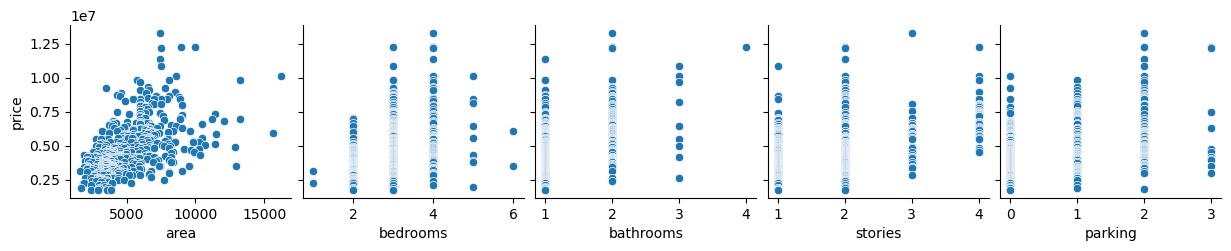

In [7]:
# Exploratory Data Analysis

sns.pairplot(data=df,x_vars=['area','bedrooms','bathrooms','stories','parking'],y_vars=['price'])
plt.show()

In [8]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [9]:
# checking unique values 
df.furnishingstatus.nunique()

3

In [10]:
char=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [11]:
# Converting all string into number

def mylist(x):
    return x.map({'yes':1,'no':0})

df[char]=df[char].apply(mylist)

In [12]:
# Creating Dummy Variables

dummy=pd.get_dummies(df['furnishingstatus'],drop_first=True).astype(int)
dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [13]:
# concating Dummay Variables

df=pd.concat([df,dummy],axis=1)

In [14]:
# droppping Columns
df=df.drop('furnishingstatus',axis=1)

In [15]:
# Checking 5 rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
my=['price','area','bedrooms','bathrooms','stories','parking']

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
df[my]=scaler.fit_transform(df[my])

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


In [19]:
# Spliting Data into X And Y

X=df.drop('price',axis=1)
y=df['price']

In [20]:
# spliting the data set into traning and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [21]:

# importing Stats Model

import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     68.41
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           3.51e-95
Time:                        22:58:00   Log-Likelihood:                 423.49
No. Observations:                 436   AIC:                            -819.0
Df Residuals:                     422   BIC:                            -761.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0224      0.020     

In [23]:
# Checking Variance


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif[ 'VIF' ] = [variance_inflation_factor(X_train.values, i)for i in range(X_train.shape[1])]
vif[ 'VIF' ] = round(vif[ 'VIF' ], 2)
vif[ 'Features' ] = X_train.columns
vif = vif.sort_values(by= 'VIF' , ascending= False )
vif

,VIF,Features
1,7.72,bedrooms
4,6.28,mainroad
0,4.70,area
3,2.77,stories
11,2.22,semi-furnished
9,2.06,parking
6,2.03,basement
12,1.88,unfurnished
2,1.73,bathrooms
8,1.71,airconditioning


In [24]:
# Dropping High Variance Column
X_1=X_train.drop('semi-furnished',axis=1)

In [25]:
X_train_sm1=sm.add_constant(X_1)

In [26]:
# Fitting Model
lr1=sm.OLS(y_train,X_train_sm1).fit()

In [27]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     74.13
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           5.36e-96
Time:                        22:58:00   Log-Likelihood:                 423.18
No. Observations:                 436   AIC:                            -820.4
Df Residuals:                     423   BIC:                            -767.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0158      0.018     

In [28]:
# Checkong VIF
vif = pd.DataFrame()
vif['Features'] = X_1.columns
vif['VIF'] = [variance_inflation_factor(X_1.values, i)for i in range(X_1.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF", ascending =False)
vif

,Features,VIF
1,bedrooms,6.88
4,mainroad,5.93
0,area,4.70
3,stories,2.77
9,parking,2.06
6,basement,2.03
2,bathrooms,1.72
8,airconditioning,1.70
5,guestroom,1.47
10,prefarea,1.46


In [29]:
X_2=X_1.drop('bedrooms',axis=1)

In [30]:
X_train_sm2=sm.add_constant(X_2)

In [31]:
lr2=sm.OLS(y_train,X_train_sm2).fit()

In [32]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     80.73
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.04e-96
Time:                        22:58:00   Log-Likelihood:                 422.58
No. Observations:                 436   AIC:                            -821.2
Df Residuals:                     424   BIC:                            -772.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0282      0.014     

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i)for i in range(X_2.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF", ascending =False)
vif

,Features,VIF
3,mainroad,5.07
0,area,4.51
2,stories,2.30
8,parking,2.04
5,basement,1.88
7,airconditioning,1.70
1,bathrooms,1.64
4,guestroom,1.47
9,prefarea,1.46
10,unfurnished,1.35


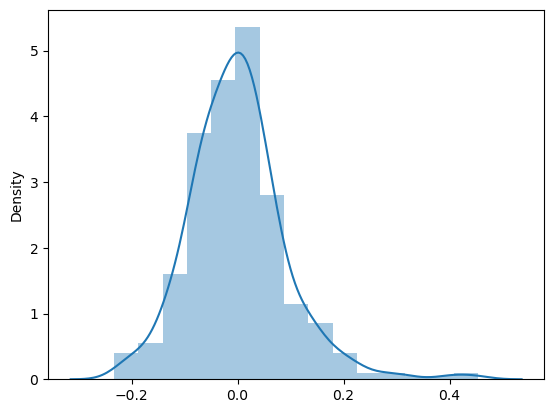

In [34]:
# Checking Rerisuals
y_train_pred =lr2.predict(X_train_sm2)
residual = (y_train - y_train_pred)
sns.distplot(residual, bins = 15)
plt.show()

In [37]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Importing  DataSet
data=pd.read_csv("advertising.csv")
# Checking Top 5 Rows
data.head(14)

FileNotFoundError: [Errno 2] No such file or directory: 'advertising.csv'

In [ ]:
# Describing Data Set
data.describe()

In [ ]:
#EDA
sns.pairplot(data=data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])
plt.show()

In [ ]:
# Checking heatmap
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
num=['TV','Sales','Radio','Newspaper']

In [ ]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
data[num]=scaler.fit_transform(data[num])
data.head()

In [ ]:
# lets build model
# Spliting Data into X And Y
X_1=data[['TV','Radio','Newspaper']]
y_1=data['Sales']

In [ ]:

# spliting the data set into traning and testing

from sklearn.model_selection import train_test_split 
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y_1,test_size=0.2,random_state=50)


In [ ]:

import statsmodels.api as sm
X_train_1_sm=sm.add_constant(X_train_1)
#ordinary least Square
lr=sm.OLS(y_train_1,X_train_1_sm).fit()

In [ ]:
print(lr.summary())

In [ ]:
# Newspaper has p value so dropping

In [ ]:

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif[ 'VIF' ] = [variance_inflation_factor(X_train_1.values, i)for i in range(X_train_1.shape[1])]
vif[ 'VIF' ] = round(vif[ 'VIF' ], 2)
vif[ 'Features' ] = X_train_1.columns
vif = vif.sort_values(by= 'VIF' , ascending= False )
vif

In [ ]:
x1=X_train_1_sm.drop('Newspaper',axis=1)

In [ ]:
X_train_sm=sm.add_constant(x1)
#ordinary least Square
lr1=sm.OLS(y_train_1,X_train_1_sm).fit()

In [ ]:
print(lr1.summary())

In [ ]:
y_pred=lr1.predict(X_train_1_sm)
y_pred.head(10)

In [ ]:
residual = (y_train_1-y_pred)
sns.distplot(residual, bins = 15)
plt.show()

In [ ]:
X_test_1_sm=sm.add_constant(X_test_1)
y_test_pred=lr1.predict(X_test_1_sm)

In [ ]:
y_test_pred.head(10)

In [38]:
# Model Evaluation 

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2=r2_score(y_test_1,y_test_pred)
r2